Modules

In [99]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import sklearn as skl


import tensorflow as tf
import imghdr
import cv2

import warnings
warnings.filterwarnings('ignore')


In [100]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [101]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

<font size = '+20'> <b> Removing corrupted images </b> </font>

In [102]:
from struct import unpack
from tqdm import tqdm

In [103]:
marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}
class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()
    
    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2 + lenchunk:]            
            if len(data)==0:
                break        

for img_class in os.listdir('data'):
    for image in os.listdir('data\\' + img_class):
        image_path = 'data\\' + img_class + '\\' + image
        image = JPEG(image_path) 
        try:
            image.decode()   
        except:
            print("INVALID_DATA!")
            os.remove(image_path)

INVALID_DATA!


In [74]:
for img_class in os.listdir('data'):
    for image in os.listdir('data\\' + img_class):
        image_path = 'data\\' + img_class + '\\' + image
        try:
            img = cv2.imread(image_path) # can display the image or exception
        except Exception as e:
            print(f'something wrong with this image {image_path}')
            os.remove(image_path)

<font size = "+20"> <b> Loading Data </b> </font>

In [104]:
data = tf._keras.utils.image_dataset_from_directory('data', shuffle = True, image_size = (256,256))

Found 42532 files belonging to 2 classes.


In [105]:
data_iterator = data.as_numpy_iterator()

In [106]:
batch = data_iterator.next()

In [107]:
print(batch[0].shape)
print(batch[1])

(32, 256, 256, 3)
[1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1]


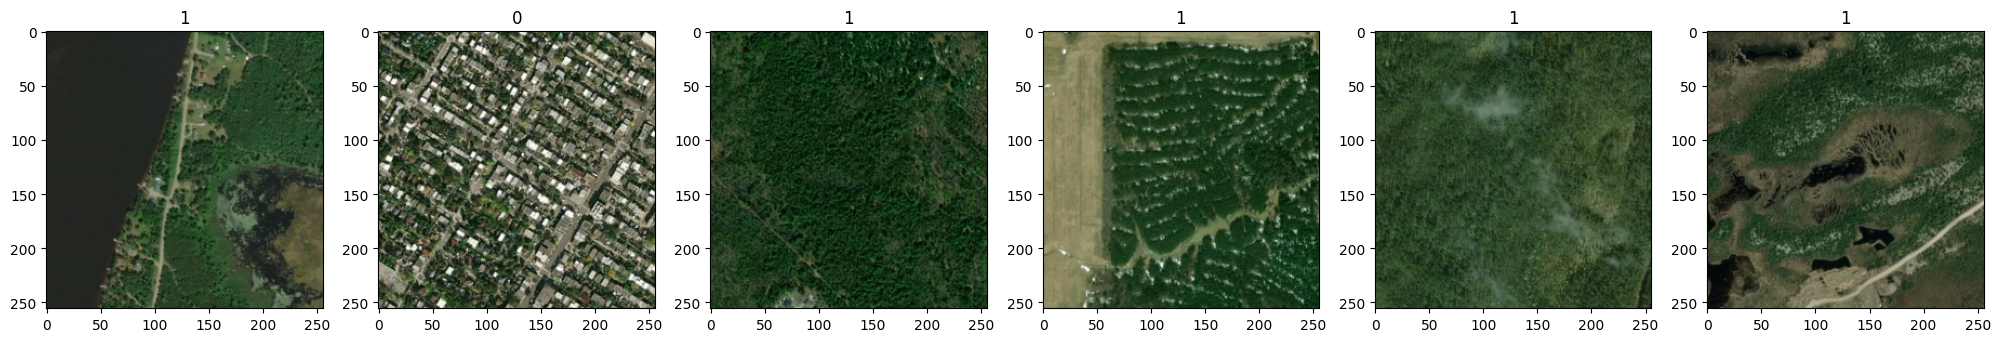

In [108]:
fig, ax = plt.subplots(ncols = 6, figsize = (25,25))
for i,image in enumerate(batch[0][:6]):
    ax[i].imshow(image.astype(int))
    ax[i].title.set_text(batch[1][i])

<font size = "+3"> <b> so class 1 for wildfire and class 0 for nowildfire </font> </b> 

In [109]:
batch[0]

array([[[[ 36.       ,  37.       ,  32.       ],
         [ 36.       ,  37.       ,  32.       ],
         [ 36.       ,  37.       ,  32.       ],
         ...,
         [ 58.583206 ,  95.583206 ,  54.583206 ],
         [ 59.761795 ,  96.31258  ,  56.660233 ],
         [ 32.568054 ,  68.568054 ,  30.568054 ]],

        [[ 36.       ,  37.       ,  32.       ],
         [ 36.       ,  37.       ,  32.       ],
         [ 36.       ,  37.       ,  32.       ],
         ...,
         [ 39.87918  ,  76.87918  ,  35.87918  ],
         [ 29.792892 ,  66.34367  ,  26.69133  ],
         [ 25.811325 ,  61.811325 ,  23.811325 ]],

        [[ 36.       ,  37.       ,  32.       ],
         [ 36.       ,  37.       ,  32.       ],
         [ 36.       ,  37.       ,  32.       ],
         ...,
         [ 33.557083 ,  70.55708  ,  29.557083 ],
         [  9.992325 ,  46.543106 ,   6.8907623],
         [  8.72934  ,  44.72934  ,   6.7293396]],

        ...,

        [[ 33.       ,  38.       ,  3

<font size = "+20"> <b> Feature scaling </font> </b> 

In [110]:
data = data.map(lambda x, y: (x / 255, y))

In [111]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
print(batch[0],'\n',batch[0].min(),batch[0].max())

[[[[0.30777618 0.36385372 0.22208945]
   [0.30052257 0.3626208  0.2178462 ]
   [0.3078387  0.37778357 0.22908564]
   ...
   [0.66931254 0.7401874  0.6905375 ]
   [0.5440801  0.64452255 0.5697642 ]
   [0.27756736 0.40076545 0.31246492]]

  [[0.31484374 0.37190562 0.2242494 ]
   [0.30606127 0.36625338 0.21762684]
   [0.30213797 0.37208283 0.21906506]
   ...
   [0.684951   0.74562806 0.69321644]
   [0.5273744  0.62108856 0.54561365]
   [0.28797516 0.40586907 0.31502613]]

  [[0.32732844 0.38615197 0.23321079]
   [0.31858814 0.37758884 0.22464767]
   [0.30647296 0.36951336 0.21627688]
   ...
   [0.5306338  0.587197   0.52773005]
   [0.4303599  0.5141768  0.43488094]
   [0.29256567 0.40007403 0.31039435]]

  ...

  [[0.30957636 0.4087163  0.25571606]
   [0.31553972 0.42264092 0.26505822]
   [0.29468188 0.4159552  0.2512493 ]
   ...
   [0.0969243  0.1894335  0.08875948]
   [0.15530024 0.23003115 0.13457415]
   [0.22042637 0.2843488  0.18525924]]

  [[0.29458386 0.4018313  0.24464686]
   [0.2

In [112]:
len(data)

1330

<font size = "+20"> <b> Data splitting</font> </b> 

In [113]:
train_size = int(len(data) * 0.7)
validate_size = int(len(data) * 0.2) + 1
test_size = int(len(data) * 0.1)

In [114]:
print(train_size,validate_size,test_size); print(f"SUM = {train_size+test_size+validate_size}")

930 267 133
SUM = 1330


In [115]:
train = data.take(train_size)
validate = data.skip(train_size).take(validate_size)
test = data.skip(train_size + validate_size).take(test_size)

In [116]:
print(len(train), len(validate), len(test))

930 267 133


<font size = "+20"> <b> Building Deep Learning Model </font> </b> 

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [118]:
model = Sequential()

<font size = "+20"> <b> CNN Architecture </font> </b>

In [119]:
model.add(Conv2D(16,(3,3),1,activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [120]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [121]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 30, 30, 16)      

In [122]:
logdir = 'logs'

In [123]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [124]:
get_accuracy = model.fit(train,epochs = 25, validation_data = validate, callbacks = [tensorboard_callback])

Epoch 1/25
930/930 [==============================] - 124s 132ms/step - loss: 0.2196 - accuracy: 0.9105 - val_loss: 0.1783 - val_accuracy: 0.9360
Epoch 2/25
930/930 [==============================] - 122s 131ms/step - loss: 0.1500 - accuracy: 0.9456 - val_loss: 0.1578 - val_accuracy: 0.9484
Epoch 3/25
930/930 [==============================] - 121s 130ms/step - loss: 0.1285 - accuracy: 0.9525 - val_loss: 0.1241 - val_accuracy: 0.9569
Epoch 4/25
930/930 [==============================] - 124s 133ms/step - loss: 0.1005 - accuracy: 0.9627 - val_loss: 0.1333 - val_accuracy: 0.9525
Epoch 5/25
930/930 [==============================] - 126s 135ms/step - loss: 0.0818 - accuracy: 0.9695 - val_loss: 0.2011 - val_accuracy: 0.9506
Epoch 6/25
930/930 [==============================] - 127s 136ms/step - loss: 0.0683 - accuracy: 0.9760 - val_loss: 0.2045 - val_accuracy: 0.9500
Epoch 7/25
930/930 [==============================] - 127s 136ms/step - loss: 0.0616 - accuracy: 0.9794 - val_loss: 0.2158 -

<font size = "+20"> <b> Performance visualization </b> </font>

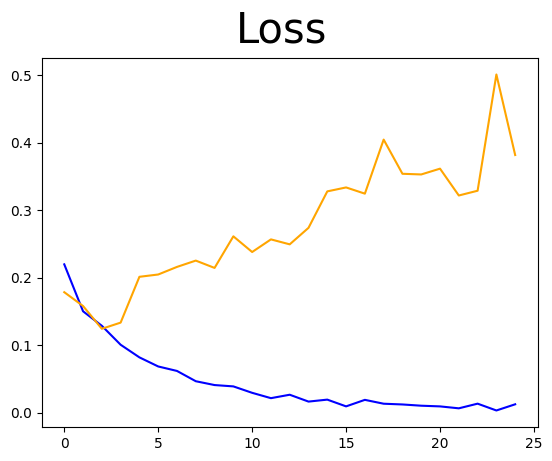

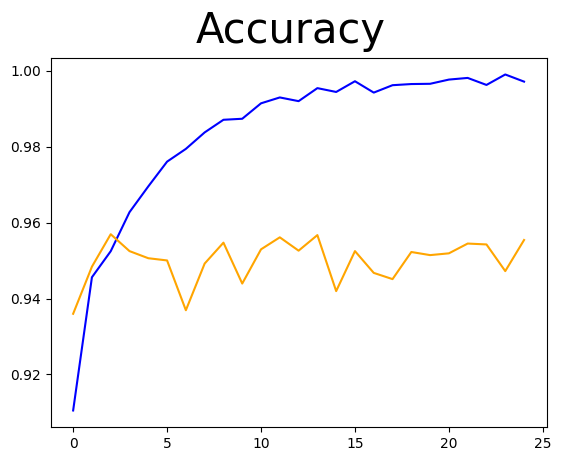

In [125]:
fig = plt.figure()
plt.plot(get_accuracy.history['loss'], color = 'blue', label = 'loss')
plt.plot(get_accuracy.history['val_loss'], color = 'orange', label = 'val_loss')

fig.suptitle('Loss',fontsize = 30)
fig.show()

fig = plt.figure()
plt.plot(get_accuracy.history['accuracy'], color = 'blue', label = 'accuracy')
plt.plot(get_accuracy.history['val_accuracy'], color = 'orange', label = 'val_accuracy')

fig.suptitle('Accuracy',fontsize = 30)
fig.show()

<font size = "+20"> <b> Model testing </b> </font>

In [126]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [127]:
precision = Precision()
recall = Recall()
binaryAccuracy = BinaryAccuracy()
cnt = 0
for batch in test.as_numpy_iterator():
    x,y = batch
    predicted_y = model.predict(x)
    precision.update_state(y,predicted_y)
    recall.update_state(y,predicted_y)
    binaryAccuracy.update_state(y,predicted_y)
    cnt = cnt + 1
    print(cnt)

1/1 [==============================] - 0s 262ms/step
1
1/1 [==============================] - 0s 47ms/step
2
1/1 [==============================] - 0s 52ms/step
3
1/1 [==============================] - 0s 39ms/step
4
1/1 [==============================] - 0s 40ms/step
5
1/1 [==============================] - 0s 46ms/step
6
1/1 [==============================] - 0s 40ms/step
7
1/1 [==============================] - 0s 47ms/step
8
1/1 [==============================] - 0s 41ms/step
9
1/1 [==============================] - 0s 47ms/step
10
1/1 [==============================] - 0s 44ms/step
11
1/1 [==============================] - 0s 63ms/step
12
1/1 [==============================] - 0s 47ms/step
13
1/1 [==============================] - 0s 36ms/step
14
1/1 [==============================] - 0s 43ms/step
15
1/1 [==============================] - 0s 50ms/step
16
1/1 [==============================] - 0s 54ms/step
17
1/1 [==============================] - 0s 59ms/step
18
1/1 [=============

In [128]:
print(f'Precision = {precision.result().numpy()}, Recall = {recall.result().numpy()}, accuracy = {binaryAccuracy.result().numpy()}')

Precision = 0.9452054500579834, Recall = 0.9591928124427795, accuracy = 0.9491485357284546


<font size = "+20"> <b> Performance Evaluation </b> </font>

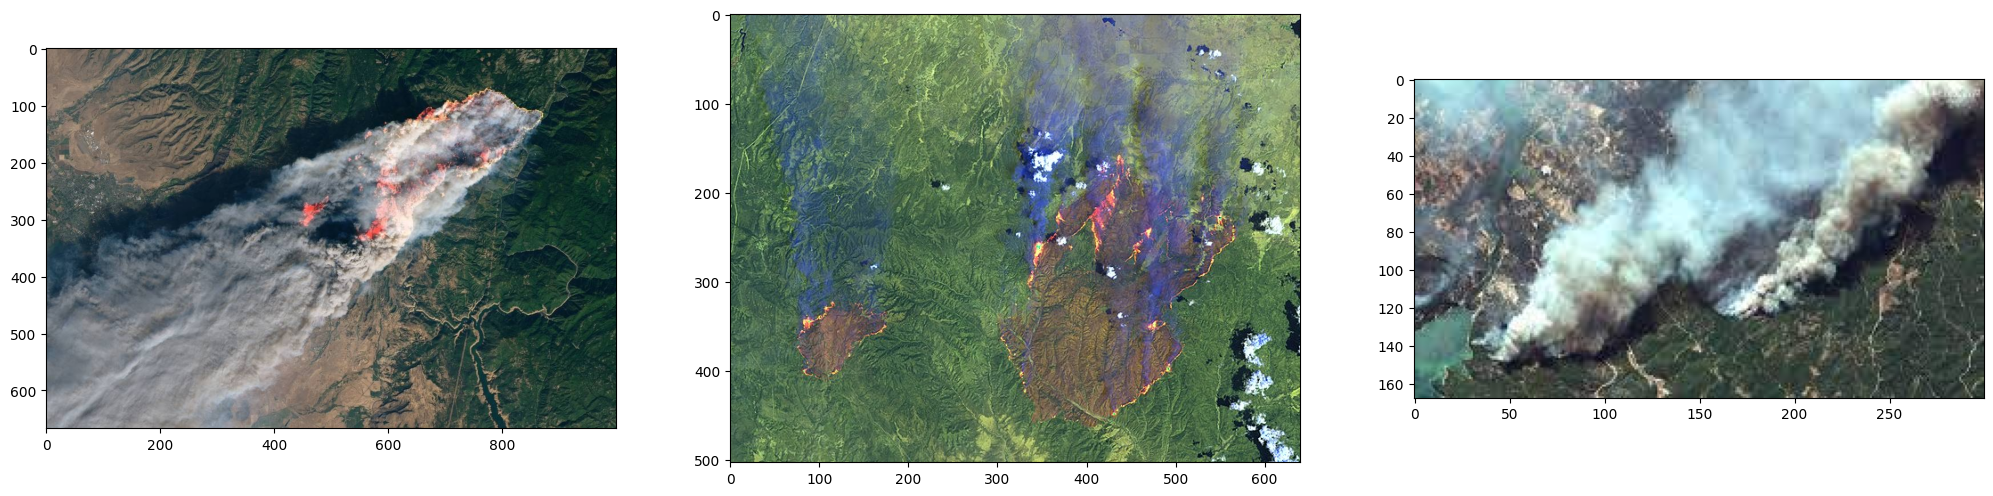

In [191]:
test_images = [cv2.imread('real_data/NASA_3.jpeg'),
               cv2.imread('real_data/Rodeo-Chediski_Fire.jpg'),
               cv2.imread('real_data/images.jpeg'),]

fig, ax = plt.subplots(ncols = 3, figsize = (25,25))

i = 0
for image in test_images:
    ax[i].imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    i = i + 1
    
fig.show()   

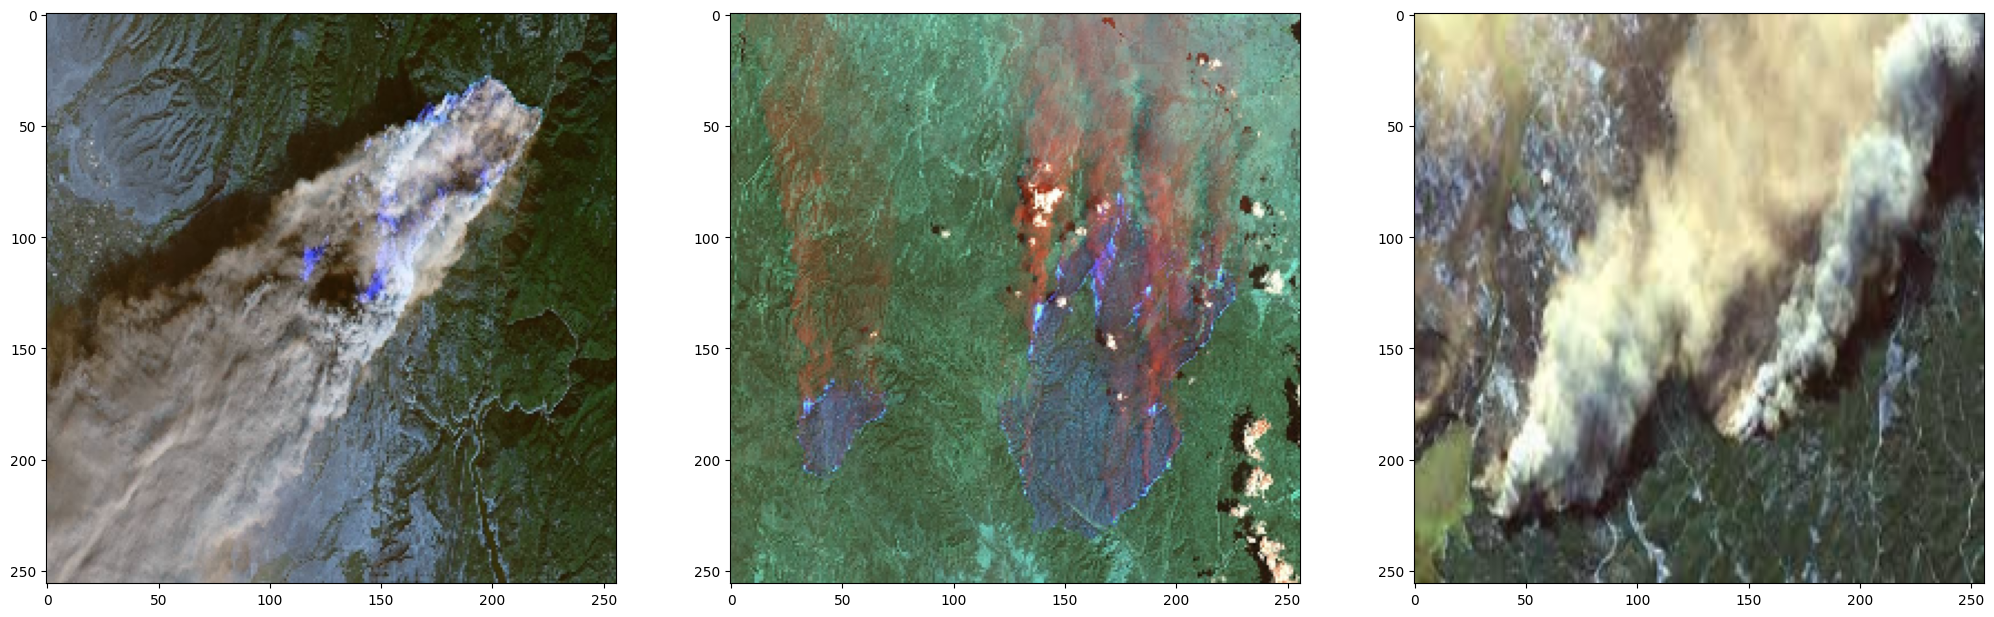

In [192]:
fig, ax = plt.subplots(ncols = 3, figsize = (25,25))

for i in range(0,3):
    test_images[i] = tf.image.resize(test_images[i],(256,256))
    ax[i].imshow(test_images[i].numpy().astype(int))
fig.show()  

In [194]:
results = []
for image in test_images:
    predicted_y = model.predict(np.expand_dims(image/255,0))
    results.append(predicted_y)

for result in results:
    if result >= 0.5:
        print('wildfire')
    else:
        print('no wildfire')

1/1 [==============================] - 0s 33ms/step
wildfire
no wildfire
no wildfire


<font size = "+20"> <b> Saving the model </b> </font>

In [198]:
from tensorflow.keras.models import load_model
model.save('models\\wildfire_detection.h5')

In [199]:
ready_model = load_model('models\\wildfire_detection.h5')

In [200]:
results = []
for image in test_images:
    predicted_y = ready_model.predict(np.expand_dims(image/255,0))
    results.append(predicted_y)

for result in results:
    if result >= 0.5:
        print('wildfire')
    else:
        print('no wildfire')

1/1 [==============================] - 0s 31ms/step
wildfire
no wildfire
no wildfire
